# 4.9 - Intro to Data Visualization with Python (Part 2)







### This script contains the following points:

* 01 - Importing Libraries
* 02 - Importing Data
* 03 - Creating Data Visualizations
    * a) Histogram of Orders by Days
    * b) Histogram of Orders by Hours
    * c) Customer Loyalty Bar Chart
    * d) Create a Subset for Line Charts
    * e) Sold Products & Days Line Chart 
    * f) Sold Products & Hours Line Chart
    * g) Sold Products by Price Range
    * h) Age & Familty Status Line Chart
    * i) Age & Income Scatterplot
* 04 - Exporting Visualizations

---

# 01 - Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

---

# 02 - Importing Data

In [2]:
# Define path

path = r'/Users/juanigalvalisi/01-07-2022 - Instacart Basket Analysis/'

In [3]:
# Import orders_products_customers_merged.pkl

df_full_merged = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
# Ignore maximum of columns

pd.options.display.max_columns = None

In [5]:
# Check the output of df_full_merged I

df_full_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_last_order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,outlier_prices,price_range,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_user_spending,spender_flag,order_frequency_median,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367797,Low Spender,20.5,NaN,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367797,Low Spender,20.5,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Most orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Average orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Most orders,10,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
# Check the output of df_full_merged II

df_full_merged.shape

(32404859, 32)

In [7]:
# Check the output of df_full_merged III

df_full_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 object 
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_last_order         float64
 6   new_customer            bool   
 7   product_id              int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  product_name            object 
 11  department_id           int64  
 12  prices                  float64
 13  outlier_prices          object 
 14  price_range             object 
 15  busiest_day             object 
 16  busiest_period_of_day   object 
 17  max_order               int64  
 18  loyalty_flag            object 
 19  mean_user_spending      float64
 20  spender_flag            object 
 21  order_frequency_median  float

---

# 03 - Creating Data Visualizations

### a) Histogram of Orders by Days

In [8]:
# Change days names instead of numbers

days = pd.DataFrame(data = {'days': ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']})

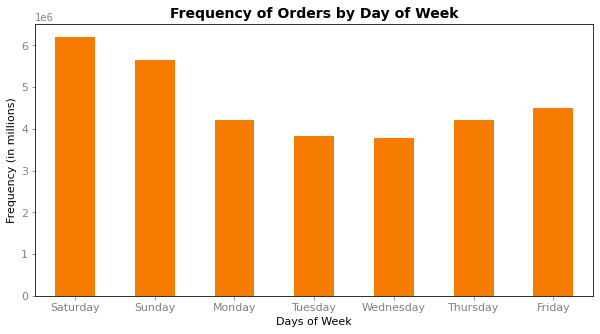

In [9]:
# Create a histogram according to what days orders are placed

days_ords_hist = df_full_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(figsize = (10, 5), color = ['#f77b00'], rot = 0)

# Set descriptions

plt.title('Frequency of Orders by Day of Week', fontsize = 14, fontweight = 'bold')
plt.xlabel('Days of Week', fontsize = 11)
plt.ylabel('Frequency (in millions)', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
days_ords_hist.set_xticklabels(days['days'], fontsize = 11)
days_ords_hist.tick_params(axis = 'both', which = 'major', labelsize = 11)
days_ords_hist.tick_params(axis = 'both', which = 'minor', labelsize = 12)

# Show chart

plt.show()

### b) Histogram of Orders by Hours

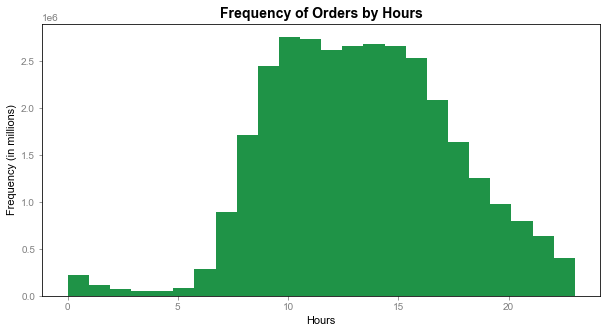

In [10]:
# Create a histogram according to what time orders are placed

hs_ords_hist = df_full_merged['order_hour_of_day'].plot.hist(bins = 24, figsize = (10, 5), color = '#1f9347')

# Set descriptions

sns.set_style('ticks')
plt.title('Frequency of Orders by Hours', fontsize = 14, fontweight = 'bold')
plt.xlabel('Hours', fontsize = 11)
plt.ylabel('Frequency (in millions)', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

In [11]:
# Check the histogram accurateness

df_full_merged['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: order_hour_of_day, dtype: int64

> #### The histogram displays the customer's activity according to the 24 hours scheme. The frequency numbers on the y-axis are established are placed for each hour in millions. From 9 to 16 are most active hours and from 10 to 11 represent the top hours in terms of performed orders.

### c) Customer Loyalty Bar Chart

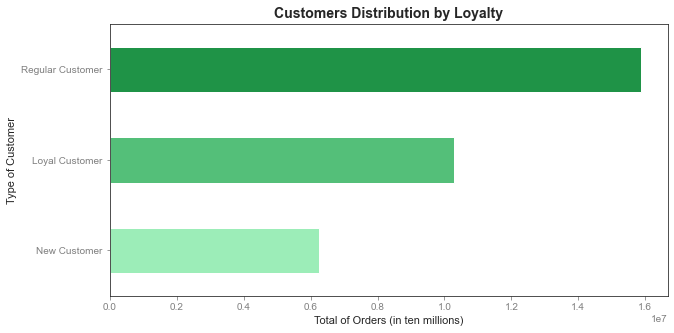

In [12]:
# Create a horizontal bar chart about the distribution of orders among customers in terms of loyalty

customer_loyalty_bar = df_full_merged['loyalty_flag'].value_counts().sort_values().plot.barh(figsize = (10, 5), color = ['#9cedb8', '#54bf79', '#1f9347'])

# Set descriptions

plt.title('Customers Distribution by Loyalty', fontsize = 14, fontweight = 'bold')
plt.xlabel('Total of Orders (in ten millions)', fontsize = 11)
plt.ylabel('Type of Customer', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

> #### The bar chart above shows the loyalty scale within our three different customer groups: Regular Customers, Loyal Customers and New Customers. As we can see, regular customers is the group with more count of orders and new customers make the least amount of orders.

### d) Create a Subset for Line Charts

In [13]:
# Set the seed

np.random.seed(1)

In [14]:
# Create a holding list True/False values to the test np.random.rand() <= 0.7

dev = np.random.rand(len(df_full_merged)) <= 0.7

In [15]:
# Check the new list

dev

array([ True, False,  True, ..., False,  True,  True])

In [16]:
# Store the 70% in the dataframe big

big = df_full_merged[dev]

In [17]:
# Store the 30% in the dataframe small

small = df_full_merged[~dev]

In [18]:
# Check both big and small dataframes I

len(df_full_merged)

32404859

### e) Sold Products & Days Line Chart 

In [19]:
# Speed up the processing

df_2 = small[['orders_day_of_week','prices']]

In [20]:
# Check the result

df_2

,orders_day_of_week,prices
1,3,9.0
13,3,4.4
20,4,4.4
21,2,4.7
24,4,1.0
...,...,...
32404839,4,10.7
32404840,3,10.7
32404851,2,10.7
32404854,4,10.7


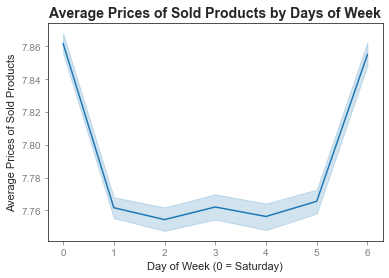

In [21]:
# Create the Line chart related to prices and days of the week (SUBSET)

days_prices_line_subset = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

# Set descriptions

plt.title('Average Prices of Sold Products by Days of Week', fontsize = 14, fontweight = 'bold')
plt.xlabel('Day of Week (0 = Saturday)', fontsize = 11)
plt.ylabel('Average Prices of Sold Products', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

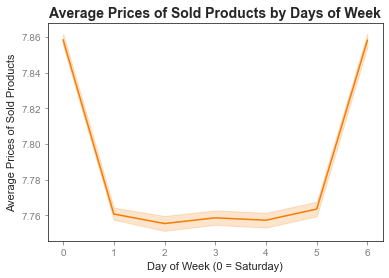

In [22]:
# Create the Line chart related to prices and days of the week (FULL DATA SET)

days_prices_line_full = sns.lineplot(data = df_full_merged[['orders_day_of_week','prices']], x = 'orders_day_of_week', y = 'prices', color = '#f77b00')

# Set descriptions

plt.title('Average Prices of Sold Products by Days of Week', fontsize = 14, fontweight = 'bold')
plt.xlabel('Day of Week (0 = Saturday)', fontsize = 11)
plt.ylabel('Average Prices of Sold Products', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

### f) Sold Products & Hours Line Chart 

In [23]:
# Speed up the processing

df_3 = small[['order_hour_of_day','prices']]

In [24]:
# Check the result

df_3

,order_hour_of_day,prices
1,7,9.0
13,12,4.4
20,8,4.4
21,8,4.7
24,7,1.0
...,...,...
32404839,0,10.7
32404840,14,10.7
32404851,22,10.7
32404854,23,10.7


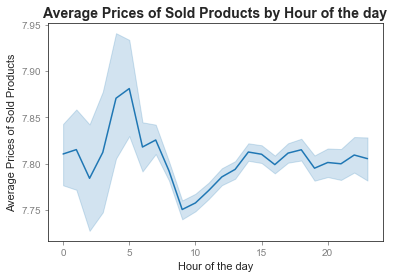

In [25]:
# Create the Line chart related to prices and hour of the day (SUBSET)

hours_prices_line_subset = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

# Set descriptions

plt.title('Average Prices of Sold Products by Hour of the day', fontsize = 14, fontweight = 'bold')
plt.xlabel('Hour of the day', fontsize = 11)
plt.ylabel('Average Prices of Sold Products', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

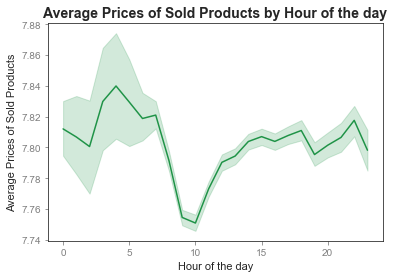

In [26]:
# Create the Line chart related to prices and hour of the day (FULL DATA SET)

hours_prices_line_full = sns.lineplot(data = df_full_merged[['order_hour_of_day','prices']], x = 'order_hour_of_day', y = 'prices', color = '#1f9347')

# Set descriptions

plt.title('Average Prices of Sold Products by Hour of the day', fontsize = 14, fontweight = 'bold')
plt.xlabel('Hour of the day', fontsize = 11)
plt.ylabel('Average Prices of Sold Products', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

### g) Sold Products by Price Range

In [27]:
# Filter prices under $100

df_full_merged.loc[df_full_merged['prices'] > 100, 'prices'] = np.nan

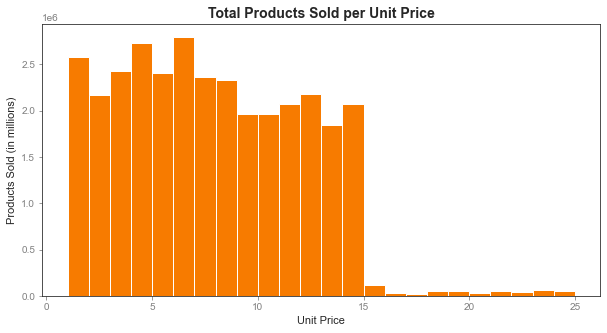

In [28]:
# Create a histogram related to unit prices and products sold

prods_price_hist = df_full_merged['prices'].plot.hist(bins = 24, figsize = (10, 5), color = '#f77b00')

# Set descriptions

plt.title('Total Products Sold per Unit Price', fontsize = 14, fontweight = 'bold')
plt.xlabel('Unit Price', fontsize = 11)
plt.ylabel('Products Sold (in millions)', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

### h) Age & Familty Status Line Chart 

In [29]:
# Speed up the processing

df_4 = small[['age','number_of_dependants']]

In [30]:
# Check the result

df_4

,age,number_of_dependants
1,31,3
13,31,3
20,31,3
21,31,3
24,31,3
...,...,...
32404839,25,0
32404840,25,0
32404851,25,0
32404854,25,0


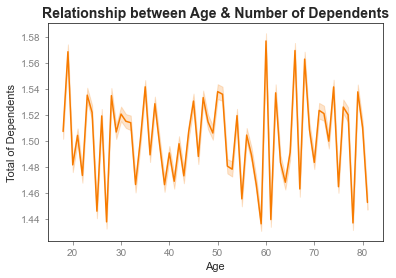

In [31]:
# Create a line chart exploring the connections between age and number of dependents

age_dependents_line = sns.lineplot(data = df_4, x = 'age', y = 'number_of_dependants', color = '#f77b00')

# Set descriptions

plt.title('Relationship between Age & Number of Dependents', fontsize = 14, fontweight = 'bold')
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Total of Dependents', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show line chart

plt.show()

> #### This line chart shows the relationship between customer's age along the x-axis and the number of dependants in each family (y-axis). With this visualization we are not able to asume that there is a relationship between age of instacart customers and the number of dependents.

### i) Age & Income Scatterplot

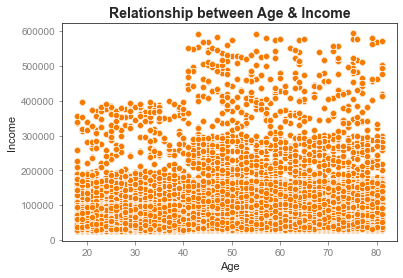

In [32]:
# Explore whether there’s a connection between age and spending power (income)

age_income_scatter = sns.scatterplot(x = 'age', y = 'income', data = df_full_merged, color = '#f77b00')

# Set descriptions

plt.title('Relationship between Age & Income', fontsize = 14, fontweight = 'bold')
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Income', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
sns.set(rc = {'figure.figsize': (10, 5)}, style = 'white')

# Show scatterplot

plt.show()

> #### This scatterplot shows the relationship of age (x-axis) and income (y-axis). With this visualization, we can develop the following observations:
>#### 1. The bulk of consumers is within the earnings of up to 200.000 USD, atomized from 18 to 81 years.
>#### 2. There is a concentration of customers from 40 to 81 years old with earnings ranging from 200.000 to 300.000 USD.
>#### 3. From the age of 40 up to 81, customers earn more from 200.000 USD to 600.000 USD.
>#### 4. Two minority groups differ from the bulk. People between 18 and 40 who earn between 200,000 and 400.000 USD, and people between 40 and 81 who earn between 300.000 and 600.000 USD.

---

# 04 - Exporting Visualizations

In [33]:
# 1) Export the orders by days histogram as a “.png” file

days_ords_hist.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'days_orders_histogram_4_9.png'))

In [34]:
# 2) Export the orders by hours histogram as a “.png” file

hs_ords_hist.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'hours_orders_histogram_4_9.png'))

In [35]:
# 3) Export the loyalty bar chart as a “.png” file

customer_loyalty_bar.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'customer_loyalty_bar_chart_4_9.png'))

In [36]:
# 4) Export the prices & days line chart (subset) as a “.png” file

days_prices_line_subset.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'days_prices_line_chart_subset_4_9.png'))

In [37]:
# 5) Export the prices & days line chart (full dataframe) as a “.png” file

days_prices_line_full.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'days_prices_line_chart_full_dataframe_4_9.png'))

In [38]:
# 6) Export the prices & hours line chart (subset) as a “.png” file

hours_prices_line_subset.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'hours_prices_line_chart_subset_4_9.png'))

In [39]:
# 7) Export the prices & hours line chart (full dataframe) as a “.png” file

hours_prices_line_full.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'hours_prices_line_chart_full_dataframe_4_9.png'))

In [40]:
# 8) Export the unit price & products histogram as a “.png” file

prods_price_hist.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'products_price_histogram_4_9.png'))

In [41]:
# 9) Export the age & number of dependents line chart as a “.png” file

age_dependents_line.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'age_dependents_line_chart_4_9.png'))

In [42]:
# 10) Export the age & income scatterplot as a “.png” file

age_income_scatter.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'age_income_scatterplot_4_9.png'))